## Problem Description

I analyse the UCI credit card default dataset available at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#.

The dataset is details of credit card holders of an "important bank in Taiwan" for the period April to September, 2005. The features available include some basic customer demographics (gender, education, marital status and age), available credit line, their history of payment/default for the six months mentioned (Apr--Sep '05), their bill amounts and their payment amounts for that period and a binary target variable indicating default the following month.

The data was originally studied by the authors of the paper: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

I perform some EDA to understand the data and clean the data, engineer relevant features, build predictive models to predict default and perform some statistical analyses to obtain a greater understanding of the features and their interactions. I finish with some business case scenarios where the predictive model could be applied.

### Dataset

There are 25 variables in the dataset. They are:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of payment in April, 2005 (NT dollar)
- default payment next month: The target variable indicating default of payment (1=default, 0=non-default)

In [1]:
# importing libraries

import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()
pd.options.display.max_columns = None

In [3]:
# Importing data
cc_df = pd.read_excel("CreditCard.xls", header=1)

In [4]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# checking for missing values
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
# checking the datatypes
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# Simplifying column names and bringing consistency
cc_df.rename(columns={"PAY_0":"PAY_1", "default payment next month":"DEFAULT"}, inplace=True)
cc_df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
cc_df.columns = [name.lower() for name in list(cc_df.columns)]
cc_df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Checking the entries of TD column

print(cc_df["id"].value_counts())
cc_df.drop(["id"], axis=1, inplace=True)

2047     1
1322     1
15629    1
9486     1
11535    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: id, Length: 30000, dtype: int64


The <b>id</b> entries are unique for every row and seem to serve the purpose of a serial number. I will drop that variable.

In [10]:
# Checking the range of the numerical entries
cc_df.describe(
    include="all"
).transpose()     #transpose view makes it more user friendly

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


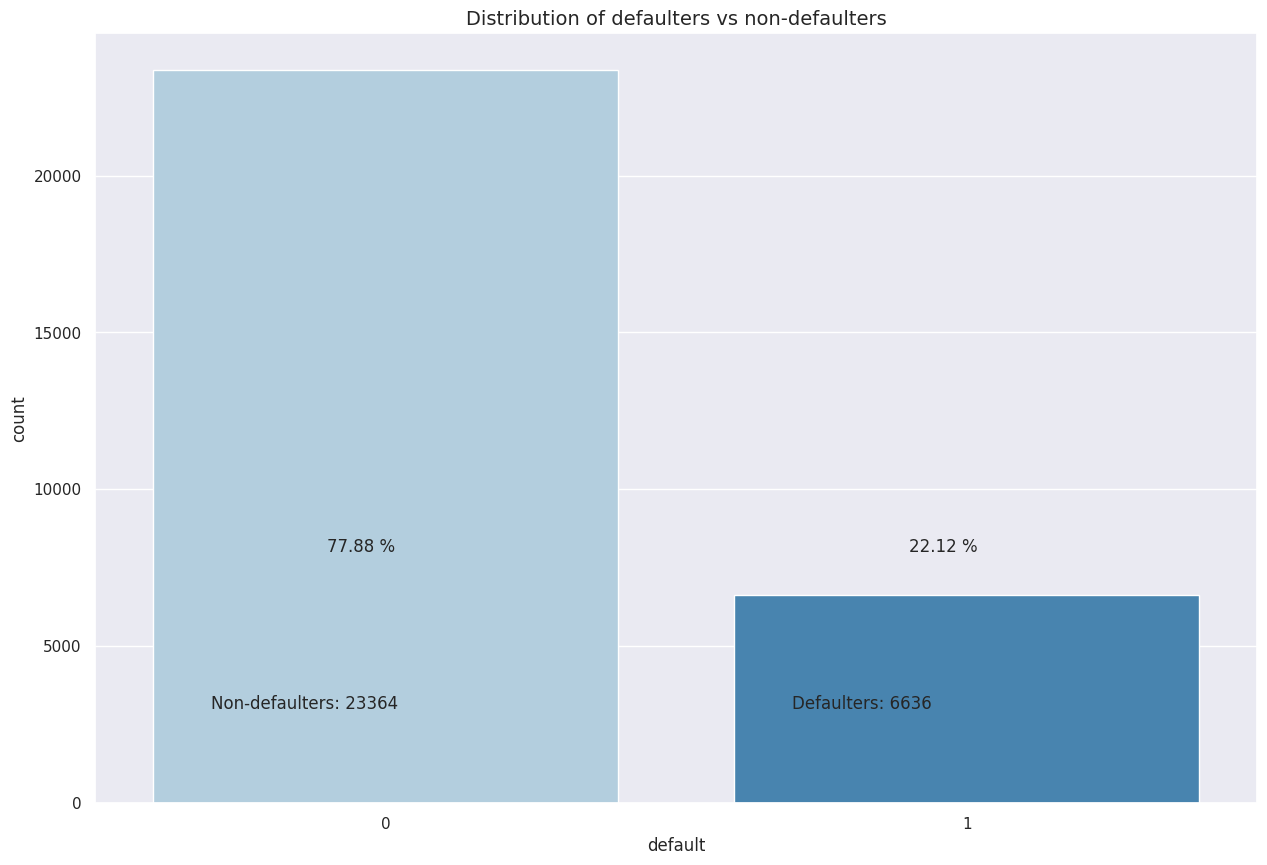

In [11]:
# The frequency of deafaults
defs = cc_df["default"].sum()
non_defs = len(cc_df) - defs

# Percentage
def_perc = round(defs/len(cc_df)*100, 4)
non_def_perc = round(non_defs/ len(cc_df)*100, 4)

plt.figure(figsize=(15, 10))
# sns.set_context('notebook', font_scale=1.2)
sns.countplot(x="default", data=cc_df, palette="Blues")  
plt.annotate(
    "Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14);

### The relationship Between the Variables and Default 

I will study the relationship between the features and credit card default. Although this is not definitive, it will give me a good understanding of the data. This will also help me make decisions about some of the features having values different than what was provided in the data description.

In [14]:
def compare_default_across_features(df, col_name, dict_label={}):
    """
    This function quantifies and displays the distribution of default across the various classes of a feature.
    
    INPUT:
    - df - (pd.DataFrame) the dataframe
    - col_name - (str) the column name of the feature being considered
    - dict_label - (dictionary) a dictionary relating the values of the column to what they represent
    
    OUTPUT:
    - Displays a bar plot showing the population distribution by feature values
    - Displays and returns a cross-tab showing the rate of default across each feature value
    - Displays a bar plot showing the population distribution and default by the feature values 
    """

    # Create a cross-tab and rename indices for readability
    cross_tab = pd.crosstab(df["default"], df[col_name], margins=True, normalize=False)

    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label

    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

    # Plot a bar graph showing population distribution by the feature values
    plt.figure(figsize=(10, 5))
    i = cross_tab.shape[1] - 1
    cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
    plt.title("Population Distribution by " + col_name, fontsize=20)
    plt.ylabel("count")
    plt.show()

    # Normalise the cross-tab and print it
    cross_tab_norm = cross_tab / cross_tab.loc["All"]
    display(cross_tab_norm)

    # Plot a bar graph showing population distribution by the feature values separating the defaulters and non-defaulters
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col_name, hue="default", data=df)
    plt.title(
        "Population Distribution by " + col_name + " with default and non-default",
        fontsize=20,
    )

    # Return the normalised cross-tab
    return cross_tab_norm

Is default proportion affected by gender?

<Figure size 1500x1000 with 0 Axes>

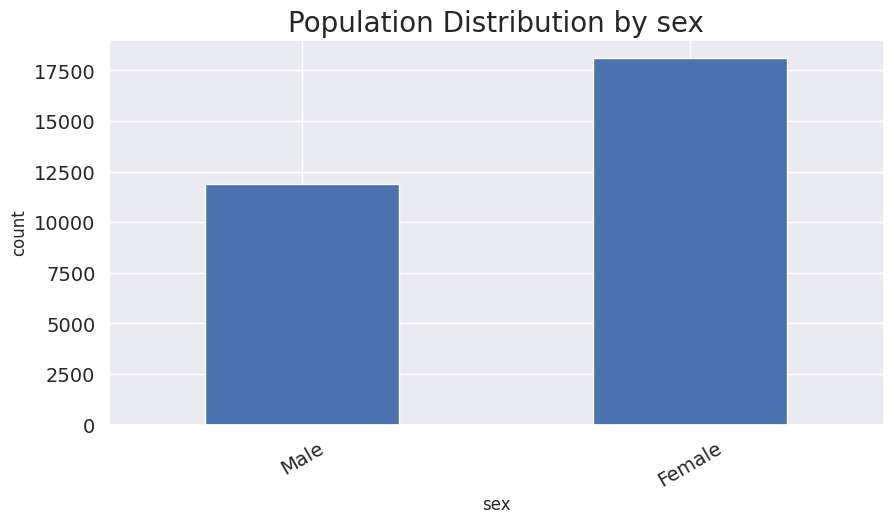

sex,Male,Female,All
default,,,
Non-default proportion,0.758328,0.792237,0.7788
Default proportion,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


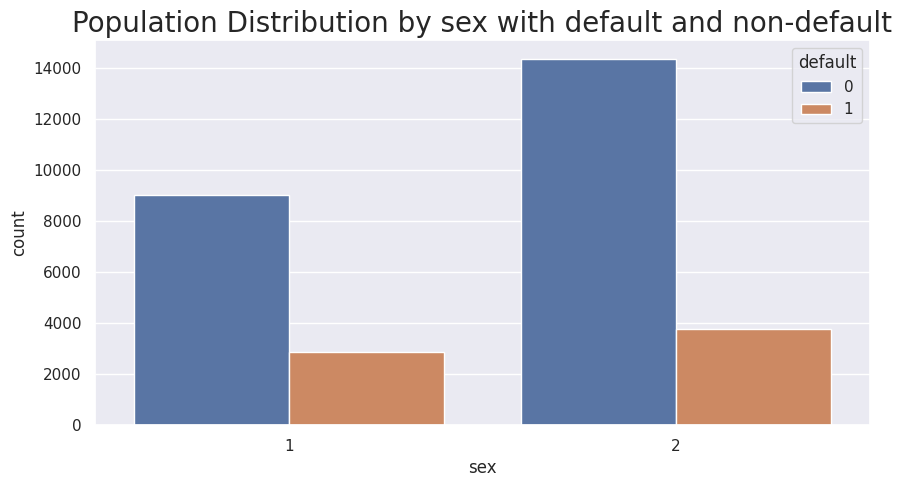

In [16]:
plt.figure(figsize=(15, 10))
_ = compare_default_across_features(cc_df, 'sex', {1: "Male", 2: "Female"});

Although there are more female credit card holders, the default proportion among men is higher. I will do a hypothesis test to see if the difference is statistically significant.

Is default proportion affected by education?

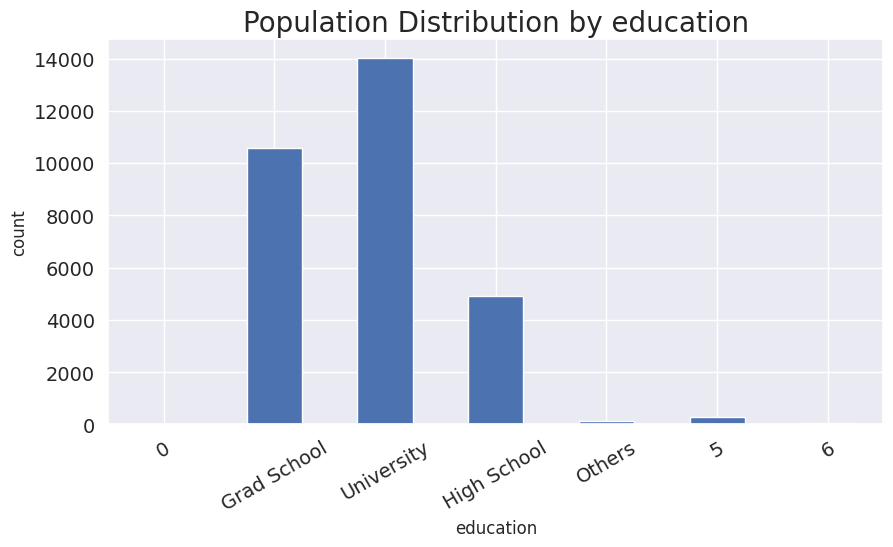

education,0,Grad School,University,High School,Others,5,6,All
default,,,,,,,,
Non-default proportion,1.0,0.807652,0.762651,0.748424,0.943089,0.935714,0.843137,0.7788
Default proportion,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.2212
All,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


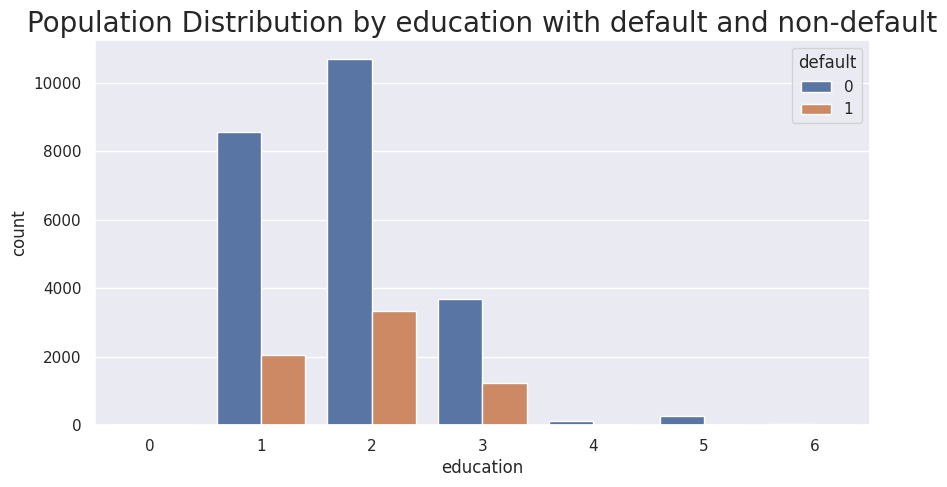

In [17]:
_ = compare_default_across_features(
    cc_df,
    "education",
    {
        0:"0",
        1:"Grad School",
        2:"University",
        3:"High School",
        4:"Others",
        5:"5",
        6:"6",
    },
    )

A quick glance shows that the default proportion decreases with higher education level. This would agree with my intuition because more educated people tend to have higher paying jobs which might make it easier for them to pay back their debts.



As I mentioned earlier, I notice that there are education categories with values 0, 5 and 6 which are not explained by the data description. I could either drop those data points, keep them or merge them with another cluster. Since there is an Others category, I will cluster them with that category. (This is done a bit later.)

Is default proportion affected by marital status?

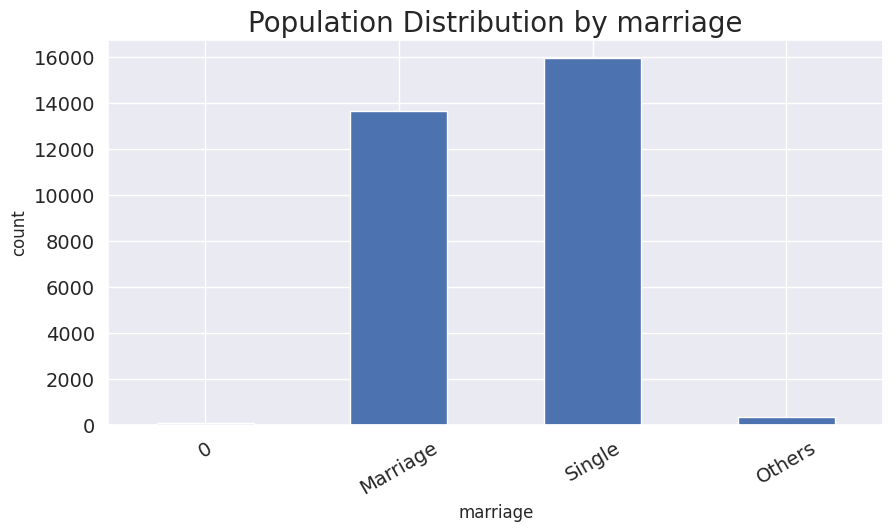

marriage,0,Marriage,Single,Others,All
default,,,,,
Non-default proportion,0.907407,0.765283,0.790717,0.739938,0.7788
Default proportion,0.092593,0.234717,0.209283,0.260062,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


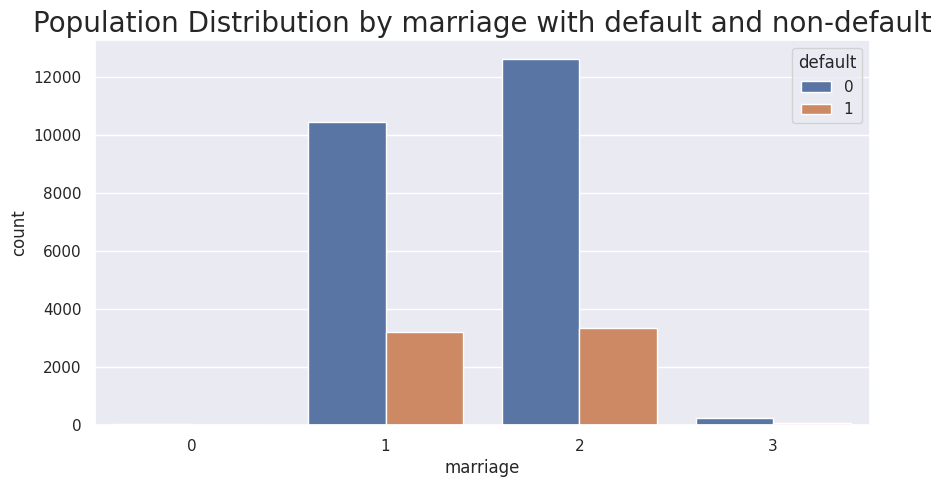

In [18]:
_ = compare_default_across_features(cc_df, "marriage", {0:"0", 1:"Marriage", 2:"Single", 3:"Others"})

Married people have higher default proportions than single folks. While there are intuitive arguments for and against it, closer inspection is needed. For example, is there a difference between married men and married women?

Also, I notice that there is a marriage category with value 0. Like earlier, since there is an Others category, I will cluster these points with that category. (This is done a bit later.)

Is the proportion of defaults correlated with age?

Since age is a discrete variable, I have to figure out a way to bin the values. There are several ways to do this (including using the frequency and quantiles) but I will choose a simpler and more intuitive way by rounding their age to the lowest multiple of 10.

In [20]:
# Creating the age bins
cc_df["age_group"] = cc_df["age"]//10
age_group_names = [str(i) + "0s" for i in range(2,8)]
age_dict = dict(zip(range(2,8), age_group_names))

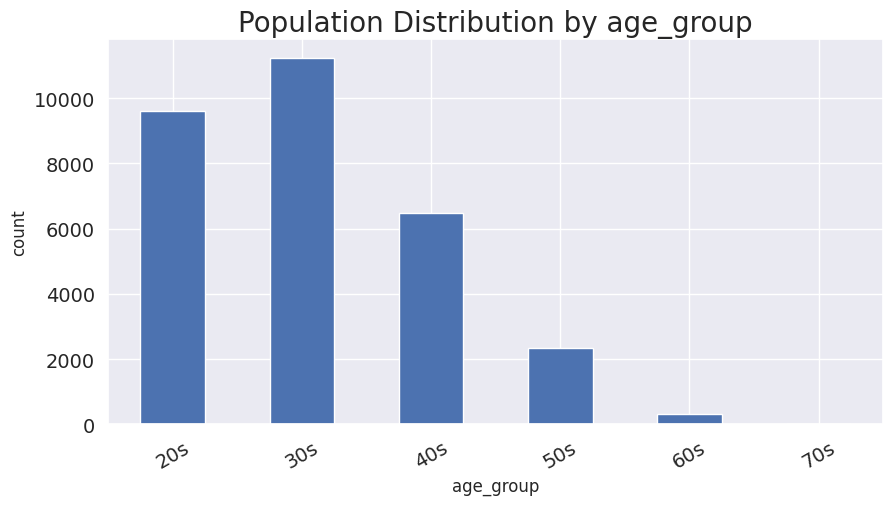

age_group,20s,30s,40s,50s,60s,70s,All
default,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


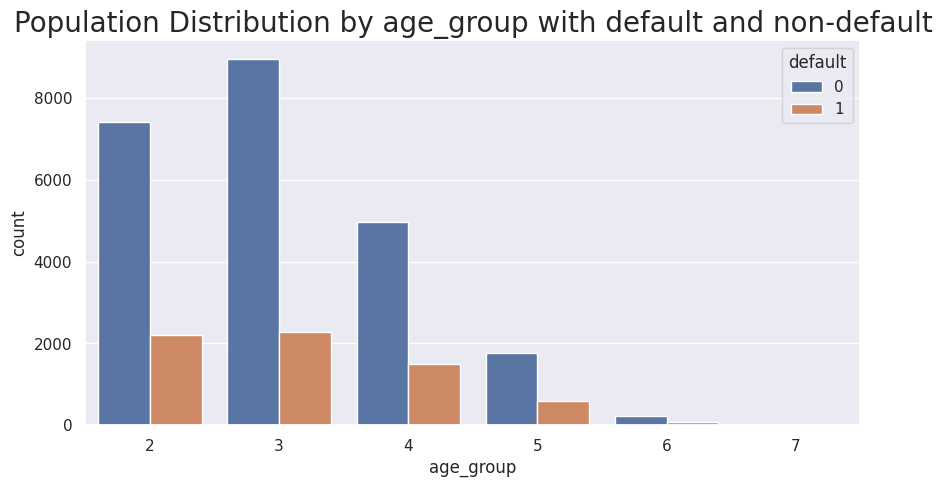

In [21]:
age_cross_tab = compare_default_across_features(cc_df, "age_group", age_dict)

Although there is no monotonic trend in the default rate, there is some change. I look closer into the numeric values.

Default Proportion Values by age_group


{'20s': 0.22842586816385943,
 '30s': 0.20252714006050898,
 '40s': 0.2297339108910891,
 '50s': 0.24861170439982913,
 '60s': 0.28343949044585987,
 '70s': 0.28}

Text(0.5, 1.0, 'Default Proportion by age_group')

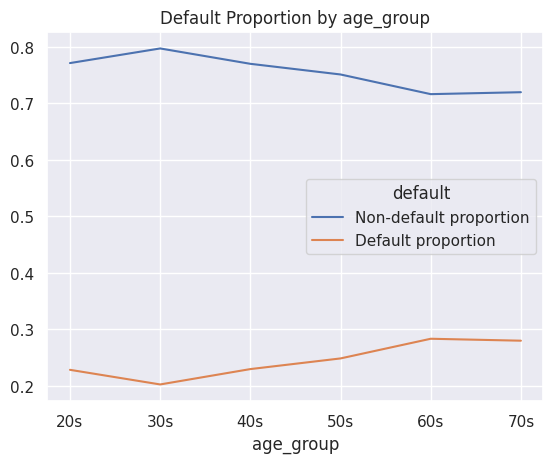

In [22]:
age_defaults = [cc_df[cc_df['age_group']==i]['default'].value_counts()[1] /
                (cc_df[cc_df['age_group']==i]['default'].value_counts()[0] + cc_df[cc_df['age_group']==i]['default'].value_counts()[1])
                for i in range (2, 8)]
print('Default Proportion Values by age_group')
display(dict(zip(age_dict.values(), age_defaults)))


age_cross_tab.iloc[:2,:6].T.plot()
plt.xticks((0, 1, 2, 3, 4, 5), age_dict.values(), rotation=0)
plt.title('Default Proportion by age_group')

It is easy to see that default proportion is lowest for people in their 30s and then steadily rises with age.

Is the default proportion affected by credit limit?

Instead of binning the credit limits, I try to see if I can analyse any trends from a density plot.

/home/vishal/Desktop/CreditCardDefaulterPrediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/home/vishal/Desktop/CreditCardDefaulterPrediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

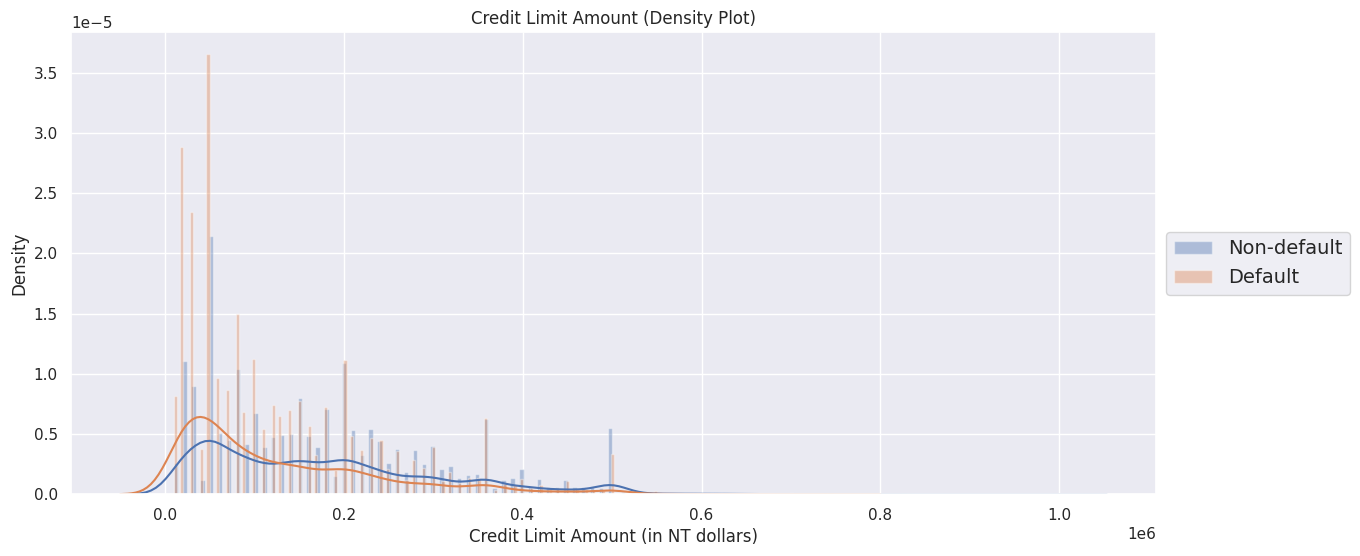

In [23]:
cc_def0 = cc_df.loc[cc_df["default"] == 0]["limit_bal"]
cc_def1 = cc_df.loc[cc_df["default"] == 1]["limit_bal"]
plt.figure(figsize = (14,6))
sns.distplot(cc_def0,kde=True,bins=200, label='Non-default')
sns.distplot(cc_def1,kde=True,bins=200, label="Default")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
plt.title('Credit Limit Amount (Density Plot)')
plt.xlabel('Credit Limit Amount (in NT dollars)')
plt.show()

Looking at the density plot, it seems that people with higher credit limit have significantly lower default proportion. Again, intuitively that is not surprising because the people who have higher credit limits must have displayed long periods of fiscal responsibility to reach that place.

Is the default proportion affected by history of past repayment status?

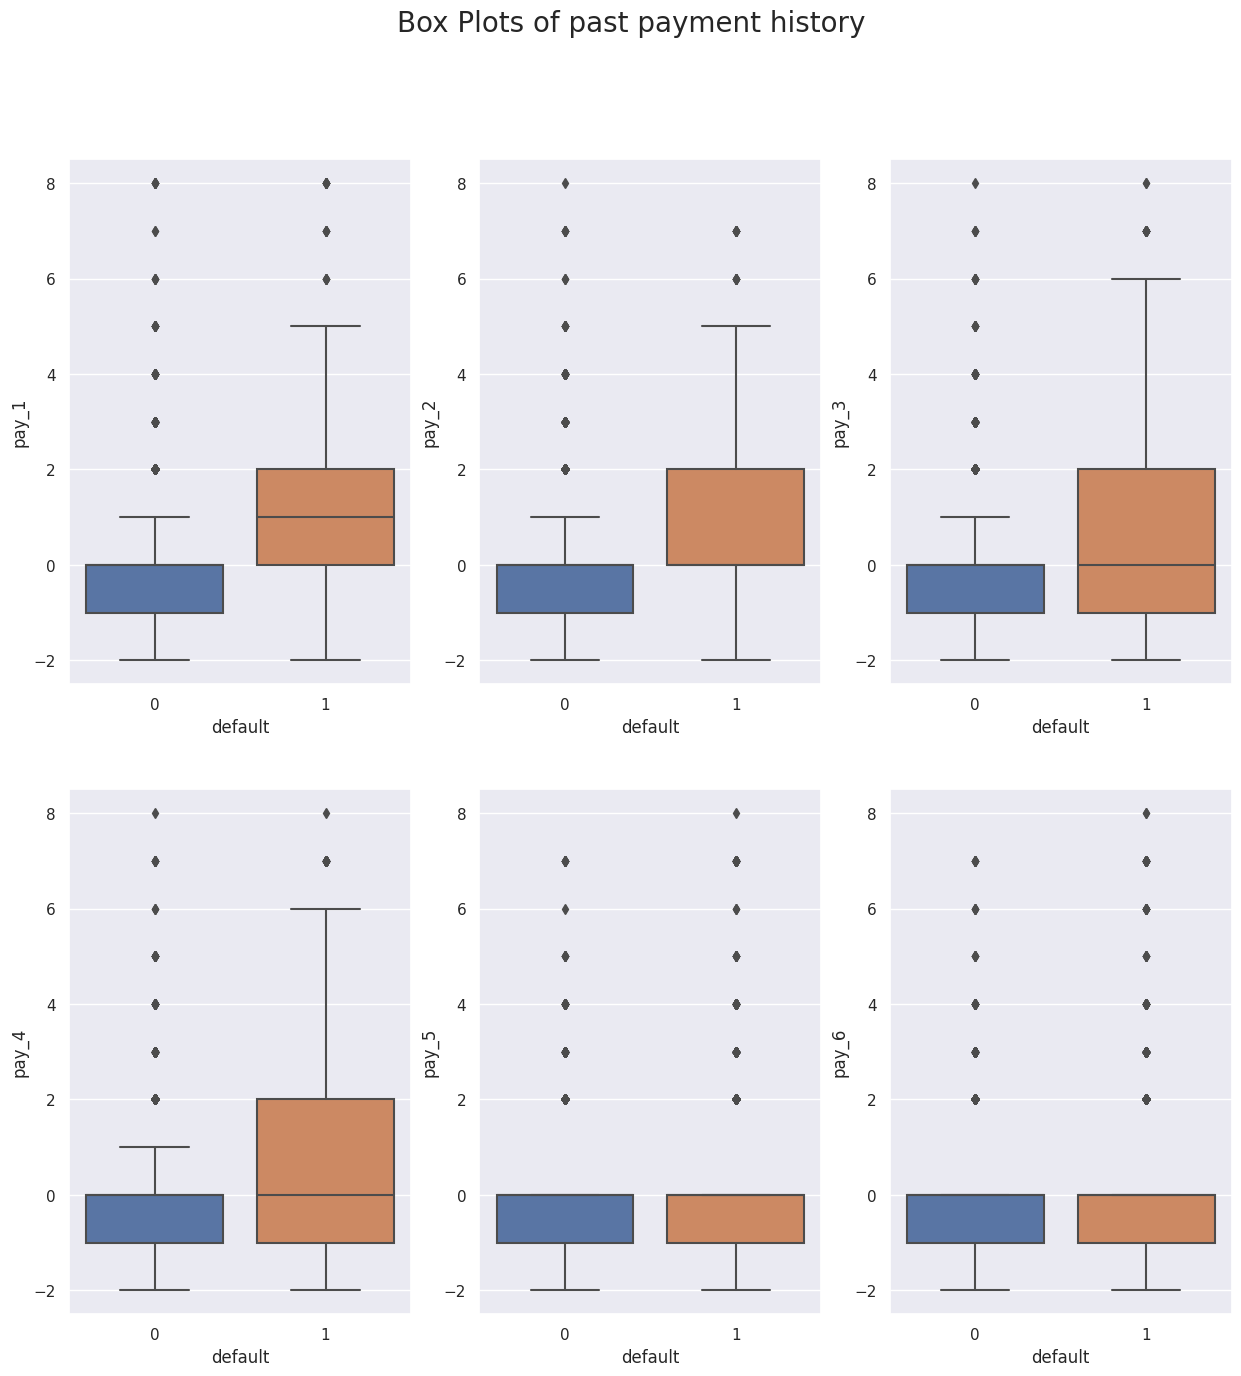

In [24]:
plt.rc('figure', figsize=(15, 15))
fig=plt.figure()
fig.suptitle('Box Plots of past payment history', fontsize=20)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    y = 'pay_' + str(i)
    sns.boxplot(x='default', y=y, data=cc_df)
plt.show()

I would expect this to be very closely related to the default proportion. The box plots show that payment history in the two most recent months pay_1 and pay_2 is positively correlated to default. I will look at some more bar plots for a closer look.

<AxesSubplot:xlabel='pay_6', ylabel='count'>

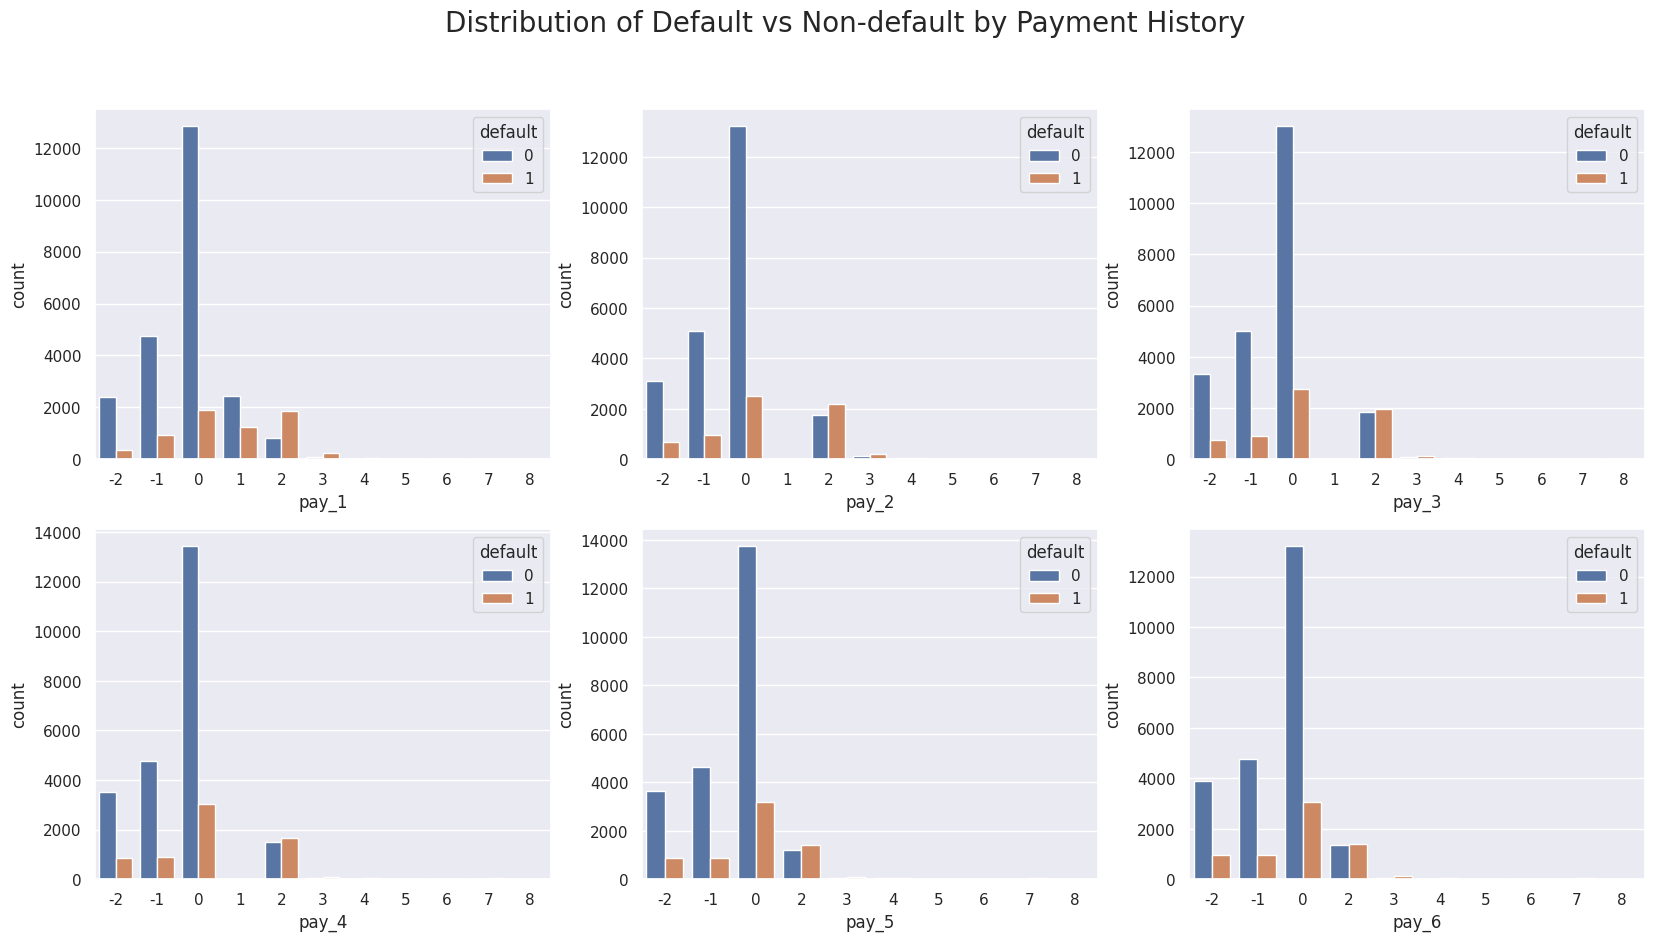

In [25]:
pay_hist = cc_df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']]

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Default vs Non-default by Payment History', size=20)
sns.countplot(x='pay_1', hue="default", data=pay_hist, ax=axes[0,0])
sns.countplot(x="pay_2", hue="default", data=pay_hist, ax=axes[0,1])
sns.countplot(x="pay_3", hue="default", data=pay_hist, ax=axes[0,2])
sns.countplot(x="pay_4", hue="default", data=pay_hist, ax=axes[1,0])
sns.countplot(x="pay_5", hue="default", data=pay_hist, ax=axes[1,1])
sns.countplot(x="pay_6", hue="default", data=pay_hist, ax=axes[1,2])

As remarked earlier, I notice that if the person has defaulted for 2 months or more in the past two months, there is a very high chance of them defaulting. Again, this agrees with my intuition.

A remark about the values of the payment history features. The data description mentioned that it would be taking values -1 and 1 to 9. However, I see that it takes values from -2 to 8, which is surprising.



One of the commenters remarked that they had emailed the professor who created the data set and he replied that the values mean the following:

-2: No consumption; (This would mean that the balance was paid in full and there were no further transactions.)

-1: Paid in full; (This would mean that the balance was paid in full but the account had a positive balance.)

0: The use of revolving credit; (This would mean that the minimum balance was paid and the user was revolving balance.)

1 = payment delay for one month;

2 = payment delay for two months;
.
8 = payment delay for eight months;

9 = payment delay for nine months and above.

In [27]:
def substitute_values(df: pd.DataFrame, col: str, old_vals:list, new_val:int) -> pd.DataFrame:
    """
    Substitute certain values of a specfic columns in a dataframe.
    """
    df[col] = np.where(df[col].isin(old_vals), new_val, df[col])

I reassign the values of pay_i's, education and marriage discussed earlier.

In [28]:
for col in ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    substitute_values(cc_df, col, [-2, -1, 0], 0)
    
substitute_values(cc_df, 'education', [0, 5, 6], 4)

substitute_values(cc_df, 'marriage', [0], 3)

A quick look at the negative bill amounts; their number and their default proportion.

In [29]:
for col in ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']:
    print(cc_df[cc_df[col]<0].shape)

(590, 25)
(669, 25)
(655, 25)
(675, 25)
(655, 25)
(688, 25)


In [30]:
print(cc_df[cc_df['bill_amt1']<0]['default'].value_counts(normalize=True))
cc_df[
    (cc_df["bill_amt1"] < 0)
    & (cc_df["bill_amt2"] < 0)
    & (cc_df["bill_amt3"] < 0)
    & (cc_df["bill_amt4"] < 0)
    & (cc_df['bill_amt5'] < 0)
    & (cc_df['bill_amt6'] < 0)
]["default"].value_counts(normalize=True)

0    0.815254
1    0.184746
Name: default, dtype: float64


0    0.704545
1    0.295455
Name: default, dtype: float64

If I were to use some dimension reduction like Non-negative Matrix Factorisation (it's superior to PCA because it gives interpretable "principal coordinates") which require non-negative values, I would consider dropping these values or reassigning them to 0 since they are a small percentage of the dataset. Since I will not have time for that, I will leave those values as they are.

### Correlation Between the Variables

/home/vishal/Desktop/CreditCardDefaulterPrediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


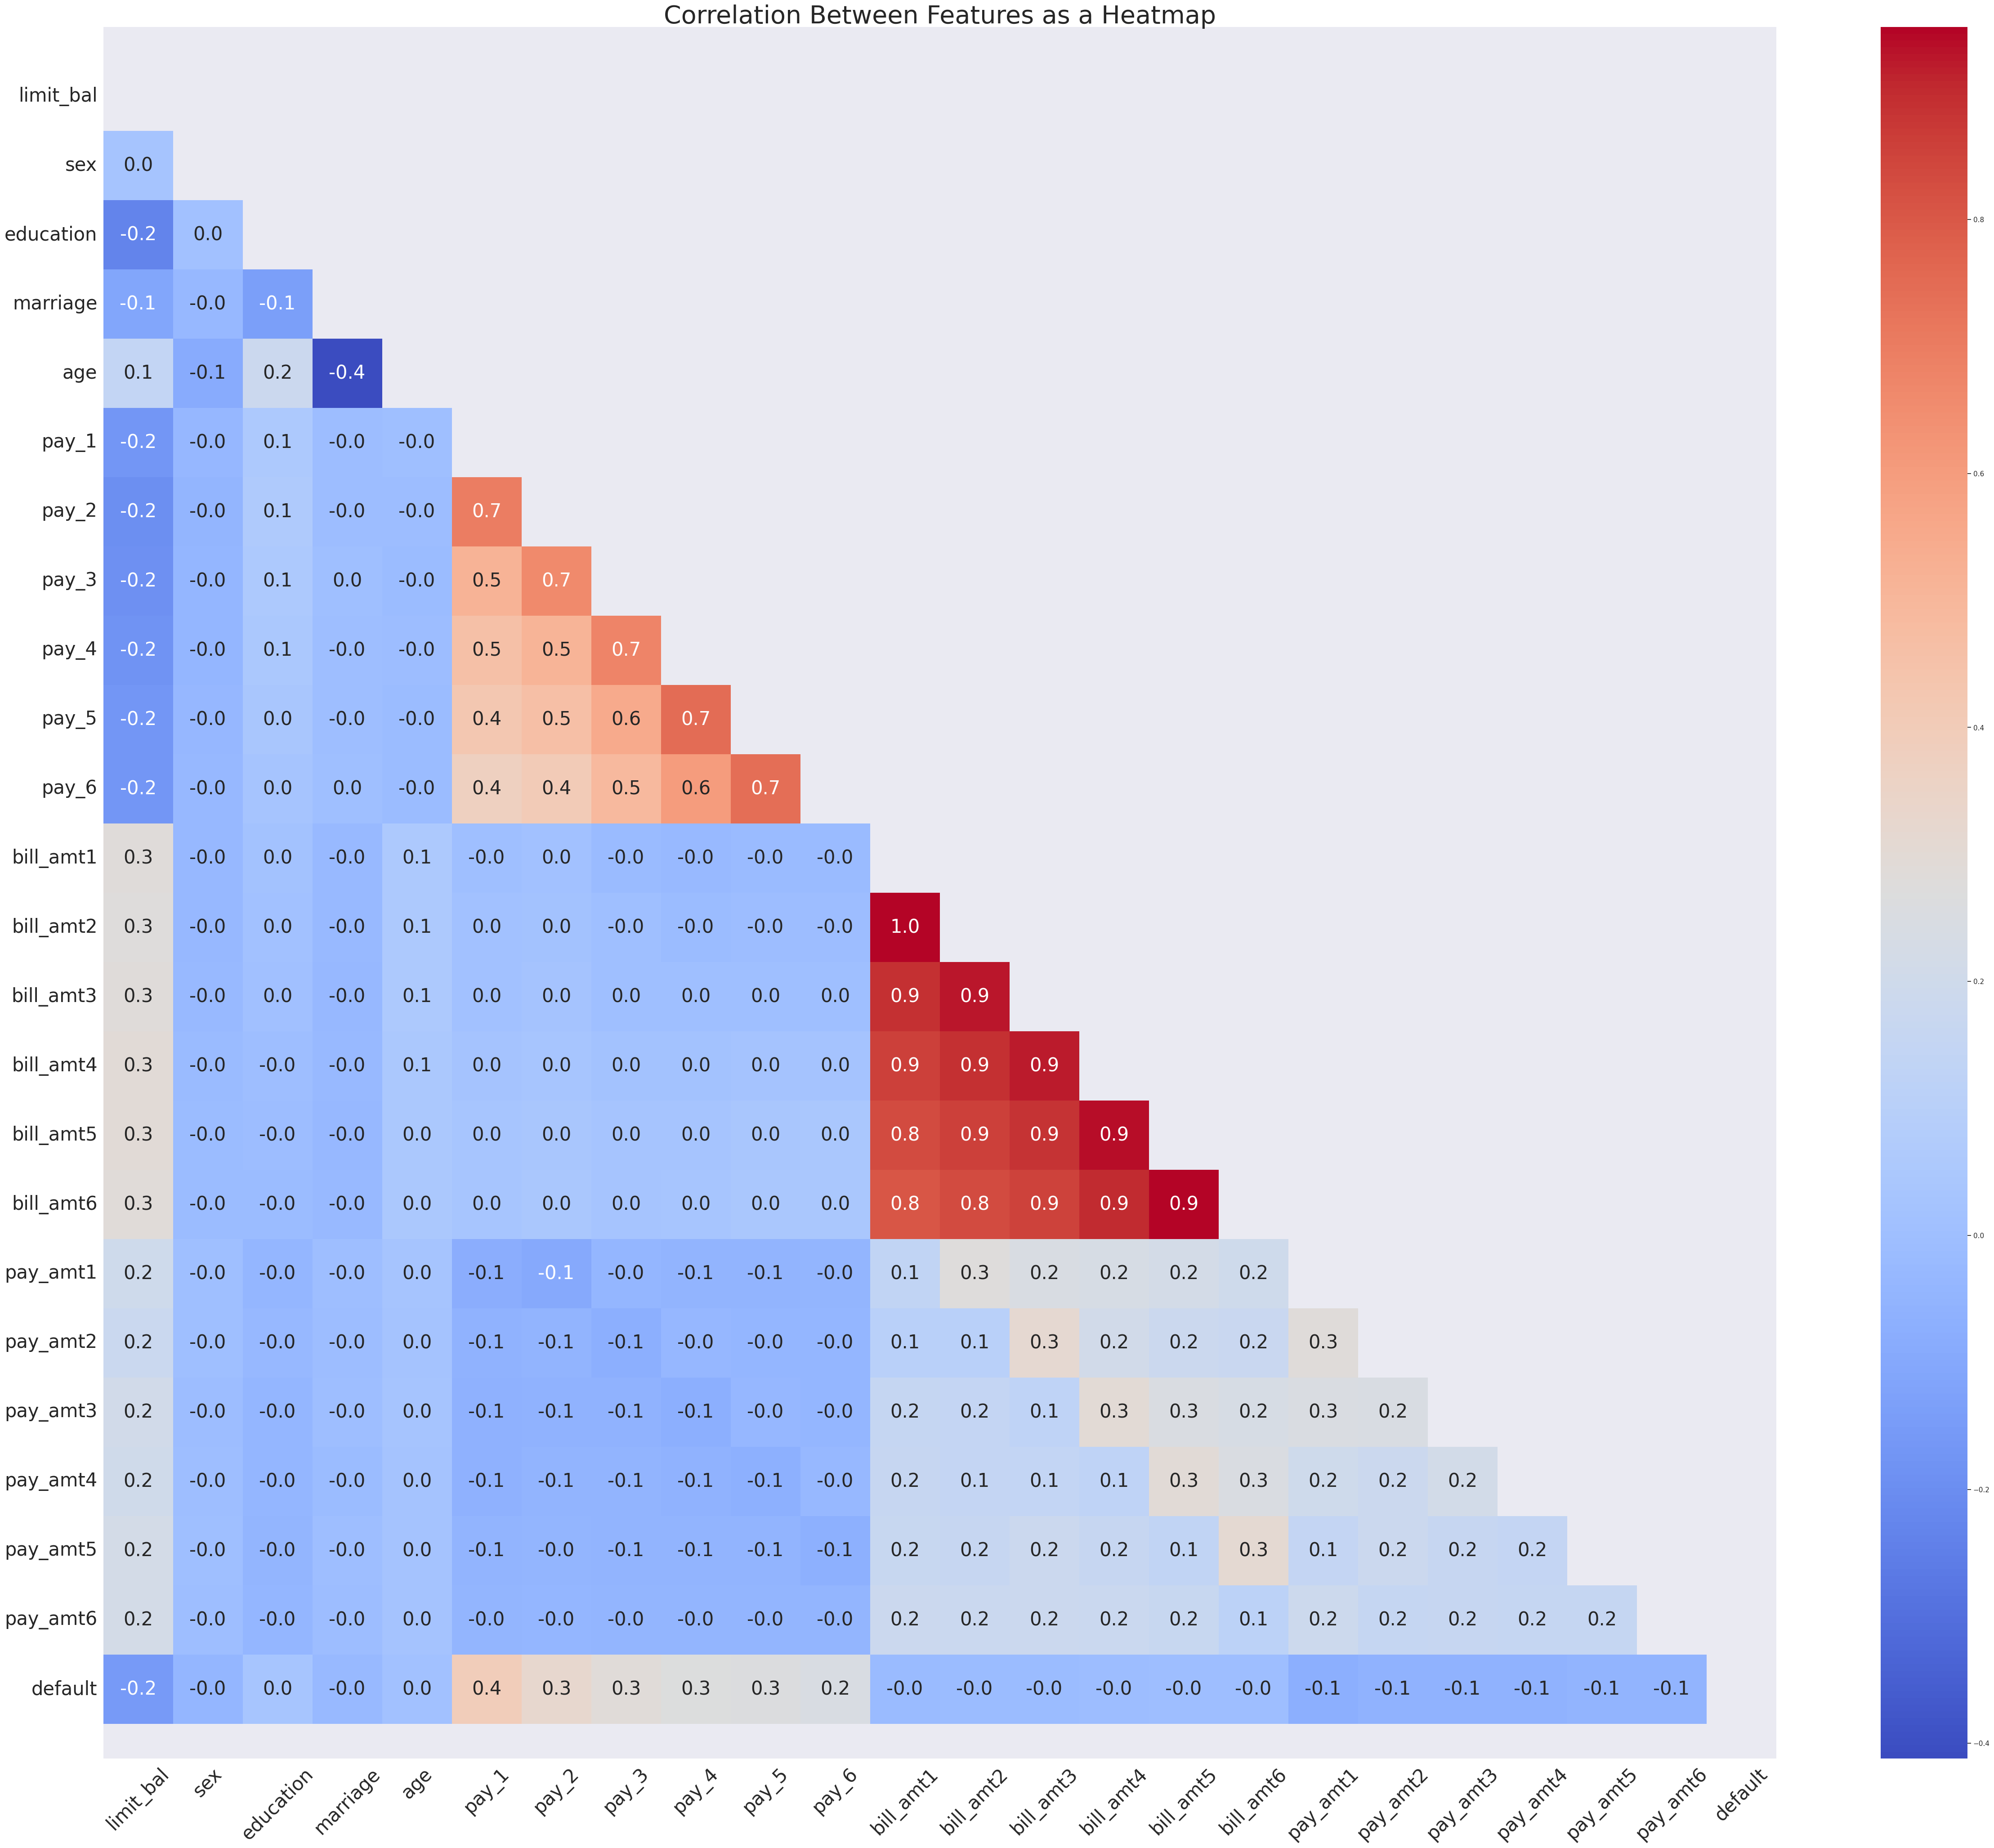

In [32]:
corr = cc_df.iloc[:, :24].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Plot the heatmap
g = sns.heatmap(data=corr, annot=True, ax=ax, cmap='coolwarm',
            cbar=True, fmt='.1f',
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":30},  #Annotation size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=30) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=45);


plt.title('Correlation Between Features as a Heatmap', size=40);

What stands out are the high correlation among the payment history features and the bill amount features. I will keep this in mind as I build my models.

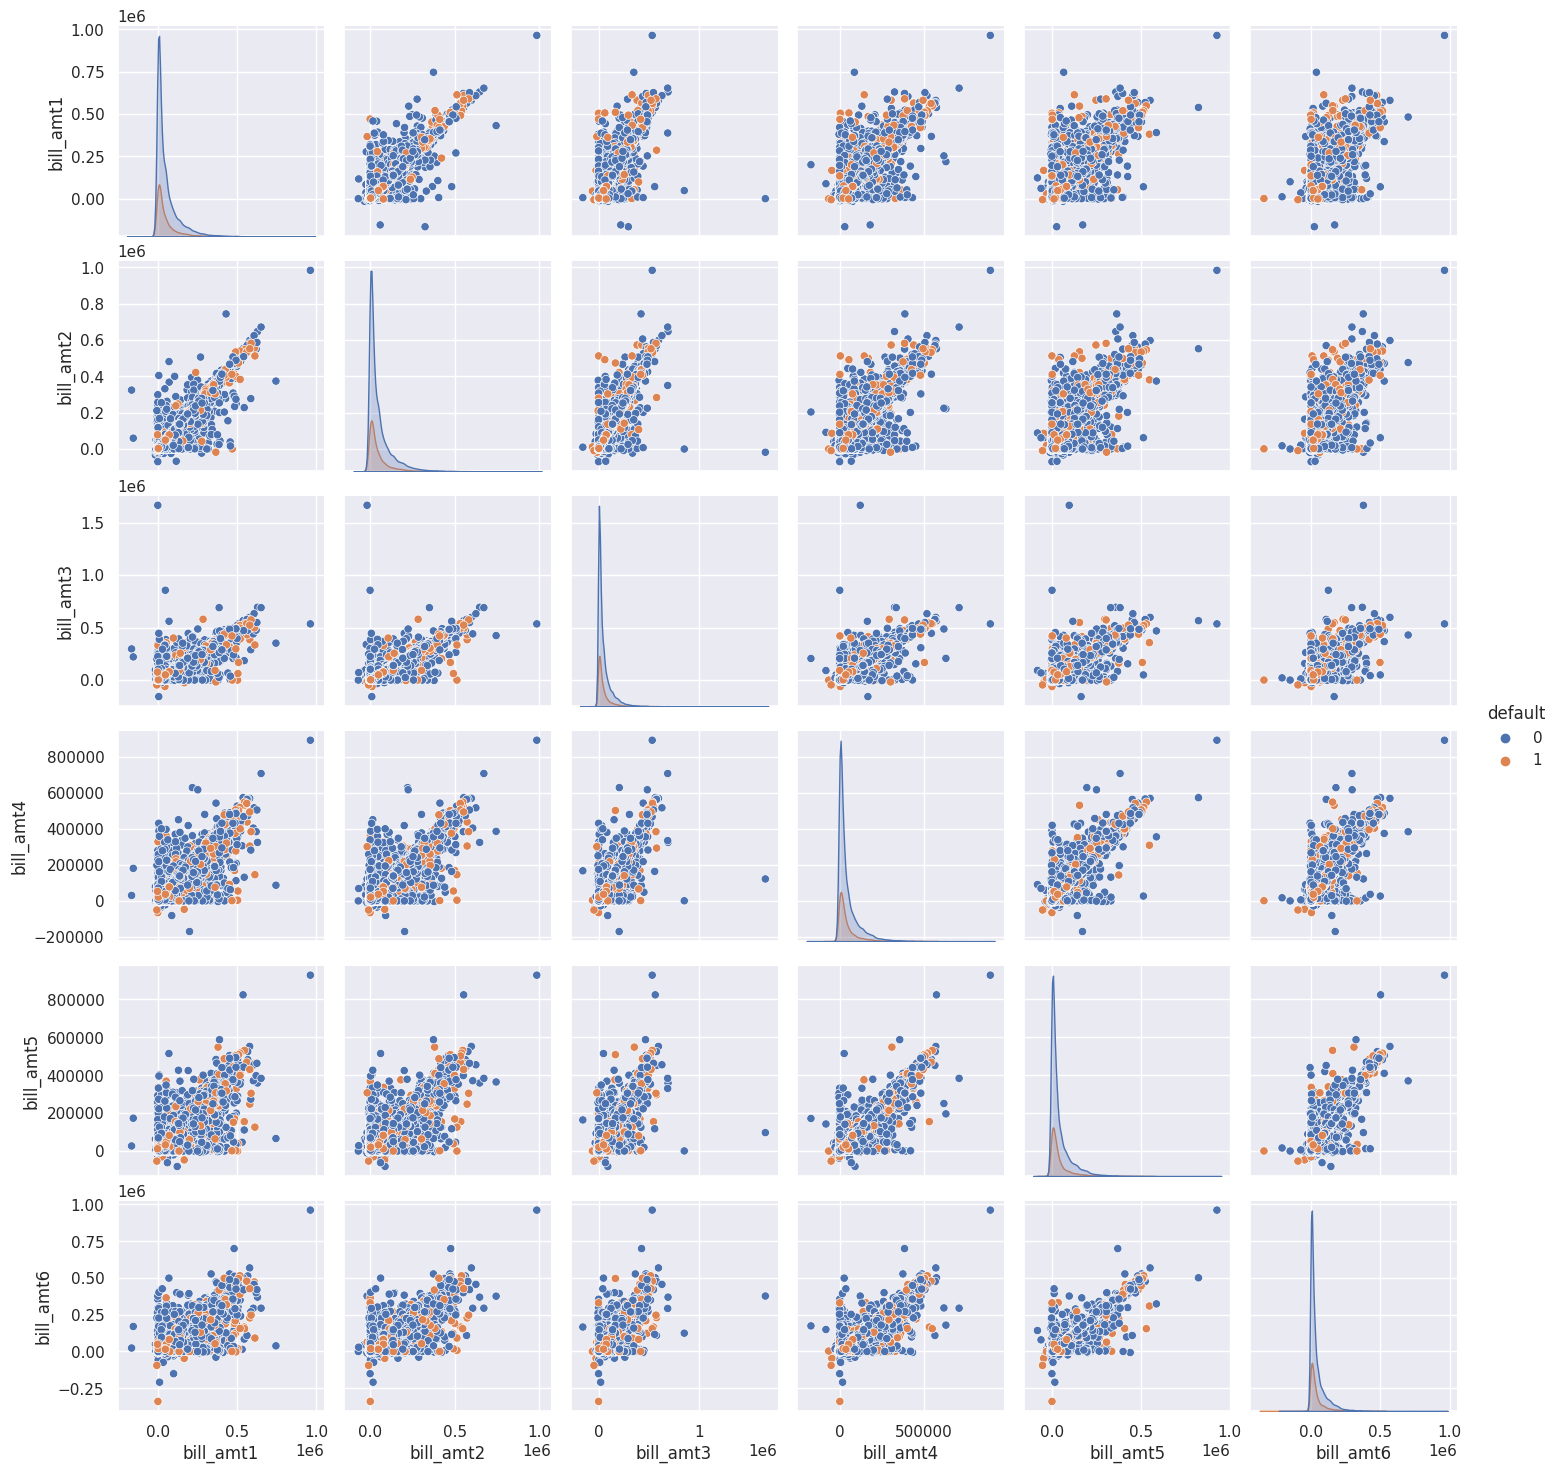

In [33]:
# Plotting the bill amount density plots and their scatter plots

sns.pairplot(cc_df, vars=cc_df.columns[11:17], kind="scatter", hue="default");

The distribution of the bill amounts are skewed. If the model assumptions require symmetric/normal distributions, a log transformation or a Box-Cox transformation might be warranted.

I will be using a MinMaxScaler later to scale the data given the presence of a lot of outliers.




Is Default Affected by Gender?
Does gender affect the default rate? I will try to answer this question with a hypothesis test. As is customary, I'll use a significance level of $\alpha = 0.05 $. Then the bounds of the confidence interval are given by [$
\frac{\alpha}{2}, 1-\frac{\alpha}{2}$] = [0.025, 0.975].

In [34]:
alpha = 0.05
lb, ub = (alpha/2), 1 - (alpha/2)
ci_bounds = [lb, ub]

I want to test whether the proportion $p_m$ of men defaulting is the same as the proportion $p_w$ of women defaulting. Hence, my test statistic is the difference between $p_m$ and $p_w$.

I state the null and alternate hypotheses:
- $H_0$: $p_m$ = $p_w$
- $H_a$: $p_m$ $\neq$ $p_w$

In [38]:
from scipy import stats

In [42]:
ttest, pval = stats.ttest_ind(cc_df[cc_df["sex"] == 1]["default"], cc_df[cc_df["sex"] == 2]["default"], equal_var=False)

In [43]:
print(pval)

if pval < 0.05:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is accepted.")

7.562495588453789e-12
The null hypothesis is rejected.


Based on the results, the null hypothesis that $p_m$ = $p_w$ is rejected.